# Análise de Dados Netflix

# Carregamento e tratamento de dados

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv('netflix.csv', parse_dates=['date_added'])

In [224]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [150]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [226]:
df_tratado = df.copy()

In [227]:
df_tratado.columns = ['id', 'tipo', 'titulo', 'diretor', 'elenco', 'pais', 'data_disponibilizacao',
       'ano_lancamento', 'classificacao', 'duracao', 'categorias', 'descricao']

# 1 - Quantos regristros e quantas colunas existem no dataset
R.: 8807 linhas e 12 colunas.

In [154]:
# desempacotamento de tuplas
linhas, colunas = df_tratado.shape

In [155]:
print(f'Total de linhas: {linhas}')
print(f'Total de colunas: {colunas}')

Total de linhas: 8807
Total de colunas: 12


# 2 - Existem colunas com valores ausentes? Quais?
R.: Sim! Colunas: diretor, elenco, pais, data_disponibilizacao, classificacao e duracao.
            

In [156]:
df_tratado.isna().sum()

id                          0
tipo                        0
titulo                      0
diretor                  2634
elenco                    825
pais                      831
data_disponibilizacao      10
ano_lancamento              0
classificacao               4
duracao                     3
categorias                  0
descricao                   0
dtype: int64

In [157]:
# quanto % isso representa do valor total
(df_tratado.isna().sum()) / linhas * 100

id                        0.000000
tipo                      0.000000
titulo                    0.000000
diretor                  29.908028
elenco                    9.367549
pais                      9.435676
data_disponibilizacao     0.113546
ano_lancamento            0.000000
classificacao             0.045418
duracao                   0.034064
categorias                0.000000
descricao                 0.000000
dtype: float64

# 3 - Quantas séries (TV Show) e quantos filmes (Movie) estão disponíveis?
R.: No catálogo estão presente atualmente 6131 filmes e 2676 series.

In [158]:
# retorna apenas quais são os valores únicos da coluna
df_tratado['tipo'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [159]:
# normalize=True é um parâmetro específico do value_counts, que tras os valores em %
df_tratado['tipo'].value_counts(normalize=True) * 100

tipo
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [160]:
filmes, series = df_tratado['tipo'].value_counts()

In [161]:
print(f'No catálogo estão presente atualmente {filmes} filmes e {series} series.')

No catálogo estão presente atualmente 6131 filmes e 2676 series.


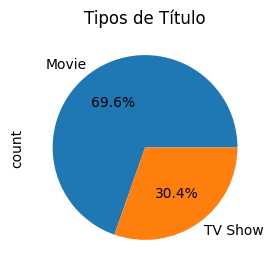

In [162]:
# autopct='%1.1f%%' traz os valores em percentuais dentro do gráfico
df_tratado['tipo'].value_counts().plot(kind='pie', title='Tipos de Título', figsize=(3, 3), autopct='%1.1f%%');

# 4 - Quantos registros no dataset estão sem país especificado? Lista os seus tipos (filmes ou série de TV), e quantidades.
R.: Há um total de 831 registros com países faltantes, destes, 440 são filmes e 391 são séries.

In [163]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [164]:
paises_faltantes = df_tratado['pais'].isna().sum()
if paises_faltantes != 0:
    print(f'Há um total de {paises_faltantes} países faltantes. ')

Há um total de 831 países faltantes. 


In [165]:
# retornando apenas um Dataframe com os dados faltantes na coluna paises
df_sem_pais = df_tratado.loc[df_tratado['pais'].isna()]

In [166]:
df_sem_pais['tipo'].value_counts()

tipo
Movie      440
TV Show    391
Name: count, dtype: int64

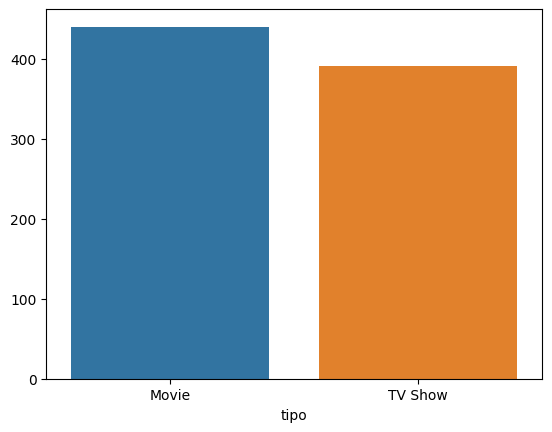

In [167]:
sns.barplot(x=df_sem_pais['tipo'].value_counts().index, y=df_sem_pais['tipo'].value_counts().values);

# 5 -  Qual a data do primeiro filme disponibilizado e qual seu título e país?
R.: O primeiro filme foi disponiblizado em 01/01/2008 e seu título é To and From New York, seu país de origem é USA.

In [168]:
df_tratado.head(1)

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [169]:
df_tratado['data_disponibilizacao'].sort_values()

8423     April 15, 2018
7521     April 16, 2019
7342     April 17, 2016
8257     April 20, 2017
6460      April 4, 2017
             ...       
7196                NaN
7254                NaN
7406                NaN
7847                NaN
8182                NaN
Name: data_disponibilizacao, Length: 8807, dtype: object

In [170]:
df_movies = df_tratado.loc[df_tratado['tipo'] == "Movie"]

In [171]:
df_movies['data_disponibilizacao'].min()

'April 1, 2016'

In [172]:
# assim
df_movies.loc[df_movies['data_disponibilizacao'] == df_movies['data_disponibilizacao'].min()]

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5854,s5855,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,"Documentaries, Music & Musicals",Frank was a rising pop star when he married Ci...
7107,s7108,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
7124,s7125,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


In [173]:
# ou assim
filtro = df_movies['data_disponibilizacao'] == df_movies['data_disponibilizacao'].min()
df_movies[filtro]

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5854,s5855,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,"Documentaries, Music & Musicals",Frank was a rising pop star when he married Ci...
7107,s7108,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
7124,s7125,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


# 6 - Qual o diretor com o maior número de títulos (filmes e séries)? Qual o seu país?
R.: Rajiv Chilaka - Índia

In [174]:
df_tratado['diretor'].value_counts()

diretor
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [175]:
filtro_diretor = df_tratado.loc[df_tratado['diretor'] == 'Rajiv Chilaka']

In [176]:
filtro_diretor.fillna('India').head(1)

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...


In [177]:
df_tratado.query("diretor == 'Rajiv Chilaka'").head(1)

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...


# 7 - Qual o filme de maior duração e menor duração?
R.: O filme com maior duração é: The School of Mischief. E o de menor é: Silent

In [178]:
df_movie = df_tratado.loc[df_tratado['tipo'] == 'Movie'].copy()

In [179]:
df_movie.head()

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [180]:
# Conferindo se há algum dado faltante na coluna 'duracao'
# Pude observar que estes valores estavam na coluna errada, 'classificacao'
df_movie.loc[df_movie['duracao'].isna()]

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [181]:
# corrigindo os dados da coluna 'duracao' que estavam na coluna 'classificacao'
df_movie.loc[[5541, 5794, 5813], 'duracao'] = '74 min', '84 min', '66 min'

In [182]:
# agora devo apagar os dados que estao errados na coluna 'classificacao', utilizei o nan do numpy para isso, ficarão como nulas
df_movie.loc[[5541, 5794, 5813], 'classificacao'] = np.nan

In [183]:
df_movie.loc[[5541, 5794, 5813]]

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [184]:
df_movie.loc[[5541, 5794, 5813], 'classificacao']

5541    NaN
5794    NaN
5813    NaN
Name: classificacao, dtype: object

In [185]:
# utilizei o replace e depois um np.astype para converter a string para int
df_movie['duracao_min'] = df_movie['duracao'].str.replace('min', '').astype(np.int64)

In [186]:
df_movie.head()

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [187]:
df_movie['duracao_min'].min()

3

In [188]:
df_movie['duracao_min'].max()

312

In [189]:
# utilizando o query para localizar o filme com maior duracao
df_movie.query("duracao_min == 312")

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312


In [190]:
df_movie.query("duracao_min == 8")

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,8


In [191]:
# utilizando o loc para localizar o filme com maior duração
df_movie.loc[df_movie['duracao_min'] == 312]

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312


In [192]:
df_movie.loc[df_movie['duracao_min'] == 8]

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,8


In [193]:
df_movie.loc[4253]

id                                                                   s4254
tipo                                                                 Movie
titulo                                          Black Mirror: Bandersnatch
diretor                                                                NaN
elenco                   Fionn Whitehead, Will Poulter, Craig Parkinson...
pais                                                         United States
data_disponibilizacao                                    December 28, 2018
ano_lancamento                                                        2018
classificacao                                                        TV-MA
duracao                                                            312 min
categorias                  Dramas, International Movies, Sci-Fi & Fantasy
descricao                In 1984, a young programmer begins to question...
duracao_min                                                            312
Name: 4253, dtype: object

In [194]:
df_movie.loc[df_movie['titulo'] == 'Black Mirror: Bandersnatch']

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao,duracao_min
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312


In [195]:
df_tratado.loc[4253, 'duracao'] = '90 min'

In [196]:
df_tratado.loc[4253]

id                                                                   s4254
tipo                                                                 Movie
titulo                                          Black Mirror: Bandersnatch
diretor                                                                NaN
elenco                   Fionn Whitehead, Will Poulter, Craig Parkinson...
pais                                                         United States
data_disponibilizacao                                    December 28, 2018
ano_lancamento                                                        2018
classificacao                                                        TV-MA
duracao                                                             90 min
categorias                  Dramas, International Movies, Sci-Fi & Fantasy
descricao                In 1984, a young programmer begins to question...
Name: 4253, dtype: object

# 8 - Qual o tempo médio de duração de um filme
O tempo médio de duração de um filme pe 99 min.

In [197]:
linhas, colunas = df_movie.shape

In [198]:
df_movie['duracao_min'].sum() / linhas

99.56499755341706

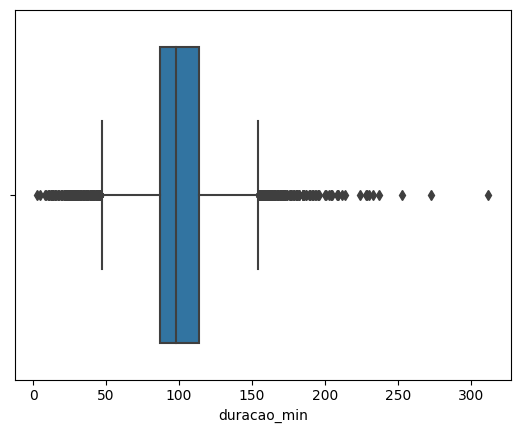

In [199]:
sns.boxplot(x=df_movie['duracao_min']);

In [200]:
df_movie['duracao_min'].sort_values(ascending=False)

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [201]:
df_movie.loc[717, 'duracao_min'] = 15
df_movie.loc[717, 'duracao'] = '15 min'

In [202]:
df_movie.loc[717]

id                                                                    s718
tipo                                                                 Movie
titulo                                         Headspace: Unwind Your Mind
diretor                                                                NaN
elenco                   Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...
pais                                                                   NaN
data_disponibilizacao                                        June 15, 2021
ano_lancamento                                                        2021
classificacao                                                         TV-G
duracao                                                             15 min
categorias                                                   Documentaries
descricao                Do you want to relax, meditate or sleep deeply...
duracao_min                                                             15
Name: 717, dtype: object

In [203]:
# dos 6131 filmes, há 203 tempos de duração únicosm sendo '90 min' os que mais se repetem, um total de 153 vezes
df_movie['duracao'].describe()

count       6131
unique       204
top       90 min
freq         152
Name: duracao, dtype: object

In [204]:
df_movie['duracao_min'].describe()

count    6131.000000
mean       99.522916
std        28.223287
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duracao_min, dtype: float64

In [205]:
round(df_movie['duracao_min'].mean(), 2)

99.52

# 9 - Liste os 3 países que produzem a maior quantidade de séries.
United States                                    760, 
United Kingdom                                   213, 
Japan                                            169.

In [206]:
df_tratado.head(2)

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [207]:
# criando uma variável para guardar um DataFrame apenas com os TV Show.
df_tv_show = df_tratado.loc[df_tratado['tipo'] == 'TV Show']

In [208]:
# verificando as colunas nulas em pais
df_tv_show.loc[df_tv_show['pais'].isna()].head()

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."


In [209]:
df_tv_show['pais'].value_counts(dropna=False)

pais
United States                                    760
NaN                                              391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 197, dtype: int64

# 10 - Em qual ano temos a maior quantidade de filmes e séries brasileiros na Netflix.
R.: 2020. Com um total de 27 séries e filmes disponibilizados.

In [210]:
df_tratado['pais'].value_counts().sort_index()

pais
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: count, Length: 748, dtype: int64

In [228]:
df_tratado_brazil = df_tratado.loc[df_tratado['pais'].notna() & df_tratado['pais'].str.contains('Brazil')].copy()

In [229]:
# por motivo da coluna 'data_disponibilizacao' se tratar de um DateTime, então pude invocar métodos referentes a essa classe.
df_tratado_brazil['data_disponibilizacao'].dt.year.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

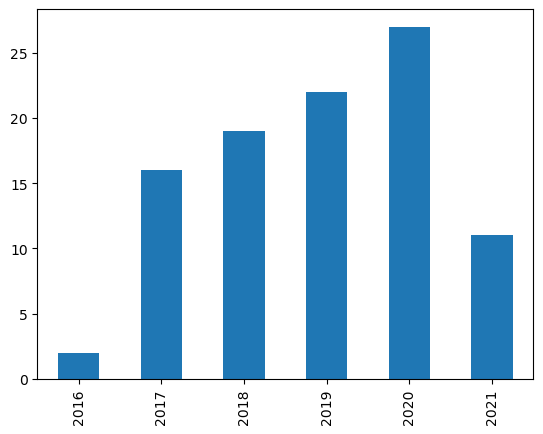

In [ ]:
# inverti pelo index utilizando o sorte by e plotei um gráfico.
df_tratado_brazil['data_disponibilizacao'].dt.year.value_counts().sort_index().sort_index().plot(kind='bar');

# 11 - Qual(ais) o(s) diretor(es) brasileiro(s) com o maior número de títulos (filmes/séries)?
R.: Os diretores brasileiros com maior número de títulos adicionados são: Lucas Margutti (3) e Diego Pignataro (3)

In [ ]:
df_tratado_brazil['diretor'].value_counts()

Lucas Margutti                  3
Diego Pignataro                 3
Marcelo Galvão                  2
Alexandre Avancini              2
Bruno Garotti                   2
                               ..
Petra Costa, Lea Glob           1
Wagner de Assis                 1
Fernando Ayllón                 1
Cavi Borges, Luciano Vidigal    1
Tiffanie Hsu                    1
Name: diretor, Length: 61, dtype: int64

# 12 - Existem mais conteúdos para adultos ou para crianças e adolescentes?
R.: Existe mais conteudo para crianças e adolescentes. Total de 4702, contra 4086 para adultos.

In [ ]:
df_tratado.head()

,id,tipo,titulo,diretor,elenco,pais,data_disponibilizacao,ano_lancamento,classificacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
adultos = ['TV-MA', 'R', 'NR']
crianca_adolescente = ['TV-14', 'TV-PG', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G', 'G']

In [ ]:
# filtrando DataFrame utilizando uma lista
df_tratado.query("classificacao in @adultos").shape

(4086, 12)

In [ ]:
# conteúdo para crianças e adolescentes
df_tratado.query("classificacao in @crianca_adolescente").shape

(4702, 12)